In [18]:
import socceraction.xthreat as xthreat
import matplotsoccer as mps
import socceraction.spadl.config as spadlconfig
import numpy as np
from scipy.interpolate import RectBivariateSpline
from mplsoccer import Pitch


In [2]:
file_path = r"C:\Users\jda\Desktop\Speciale\xtmodelv2.pkl"
xTModel = xthreat.load_model(file_path)

In [8]:
print(type(xTModel))
print(dir(xTModel))  # or print(xTModel.keys()) if it's a dict


<class 'socceraction.xthreat.ExpectedThreat'>
['_ExpectedThreat__solve', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'eps', 'fit', 'heatmaps', 'interpolator', 'l', 'move_prob_matrix', 'rate', 'rateunsuc', 'save_model', 'scoring_prob_matrix', 'shot_prob_matrix', 'transition_matrix', 'w', 'xT']


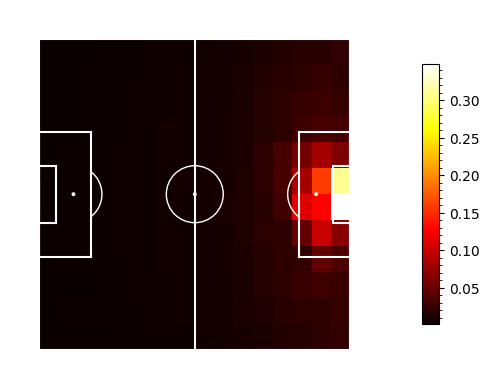

<Axes: >

In [5]:
mps.heatmap(xTModel.xT, cmap="hot", linecolor="white", cbar="False")

In [11]:
xT = np.array(xTModel.xT)

print(type(xT))
print(xT.shape)  # Should be (16, 12)

<class 'numpy.ndarray'>
(12, 16)


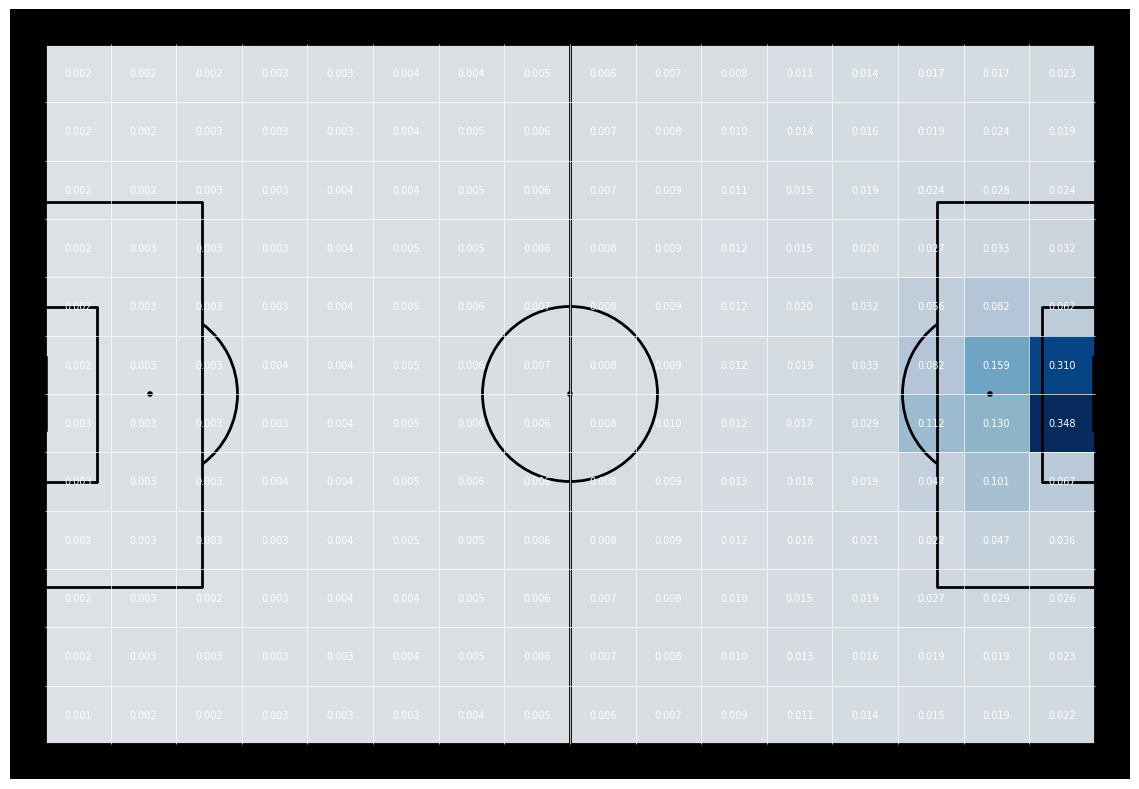

In [42]:
from mplsoccer import Pitch
import numpy as np
from socceraction.xthreat import load_model

# Load the xT model
file_path = r"C:\Users\jda\Desktop\Speciale\xtmodelv2.pkl"
xTModel = load_model(file_path)
xT = np.array(xTModel.xT)  # shape: (12, 16)
pitch = Pitch(line_color='black', pitch_color='black')
fig, ax = pitch.draw(figsize=(12, 8))  # Adjust figure size for a bigger map

# Draw heatmap
heatmap = ax.imshow(
    xT,
    extent=(0, pitch.dim.pitch_length, 0, pitch.dim.pitch_width),
    origin='lower',
    cmap='Blues',
    alpha=0.9  # Slight transparency to make grid lines visible
)

#grid lines
rows, cols = xT.shape
cell_length = pitch.dim.pitch_length / cols
cell_width = pitch.dim.pitch_width / rows

# vertical lines
for j in range(1, cols):
    ax.vlines(j * cell_length, 0, pitch.dim.pitch_width, color='white', linewidth=0.5)

# horizontal lines
for i in range(1, rows):
    ax.hlines(i * cell_width, 0, pitch.dim.pitch_length, color='white', linewidth=0.5)

# add value
for i in range(rows):
    for j in range(cols):
        val = xT[i, j]
        x = cell_length * (j + 0.5)
        y = cell_width * (i + 0.5)
        ax.text(x, y, f"{val:.3f}", ha='center', va='center', color='white', fontsize=7)

# No color bar added

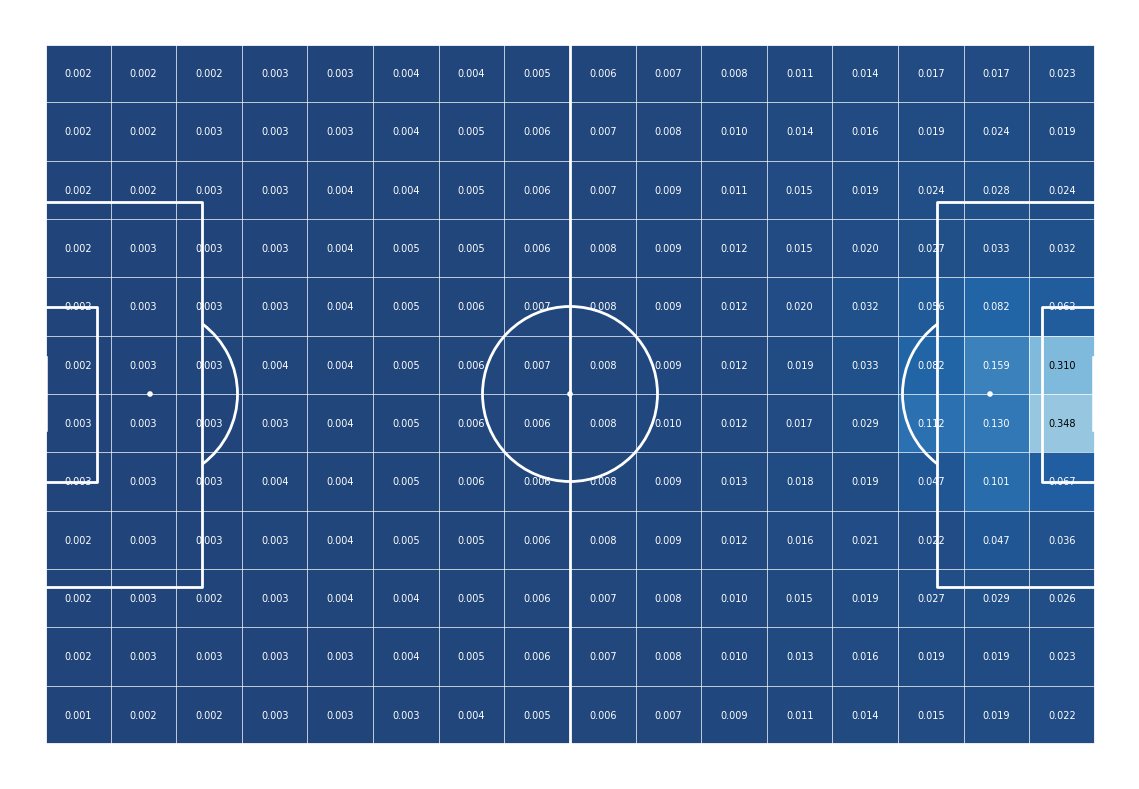

In [69]:
from mplsoccer import Pitch
import numpy as np
from socceraction.xthreat import load_model
from matplotlib.colors import Normalize

# Load the xT model
file_path = r"C:\Users\jda\Desktop\Speciale\xtmodelv2.pkl"
xTModel = load_model(file_path)
xT = np.array(xTModel.xT)  # shape: (12, 16)

# Create a pitch with a larger figure size
pitch = Pitch(line_color='white', pitch_color='white')
fig, ax = pitch.draw(figsize=(12, 8))  # Adjust figure size for a bigger map

# Normalize the colormap to adjust the scale
norm = Normalize(vmin=0.001, vmax=0.6)  # Adjust vmax to control the upper limit of the scale

# Draw heatmap using ax.imshow with the 'Blues' colormap and normalization
heatmap = ax.imshow(
    xT,
    extent=(0, pitch.dim.pitch_length, 0, pitch.dim.pitch_width),
    origin='lower',
    cmap='Blues_r',  # Use tahe 'Blues' colormap
    norm=norm,     # Apply normalization
    alpha=0.9
)

# Add grid lines manually
rows, cols = xT.shape
cell_length = pitch.dim.pitch_length / cols
cell_width = pitch.dim.pitch_width / rows

# Draw vertical lines
for j in range(1, cols):
    ax.vlines(j * cell_length, 0, pitch.dim.pitch_width, color='white', linewidth=0.5)

# Draw horizontal lines
for i in range(1, rows):
    ax.hlines(i * cell_width, 0, pitch.dim.pitch_length, color='white', linewidth=0.5)

# Annotate each cell with its value
for i in range(rows):
    for j in range(cols):
        val = xT[i, j]
        x = cell_length * (j + 0.5)
        y = cell_width * (i + 0.5)
        # Change text color based on value for better visibility
        text_color = 'white' if val < 0.5 * xT.max() else 'black'
        ax.text(x, y, f"{val:.3f}", ha='center', va='center', color=text_color, fontsize=7)



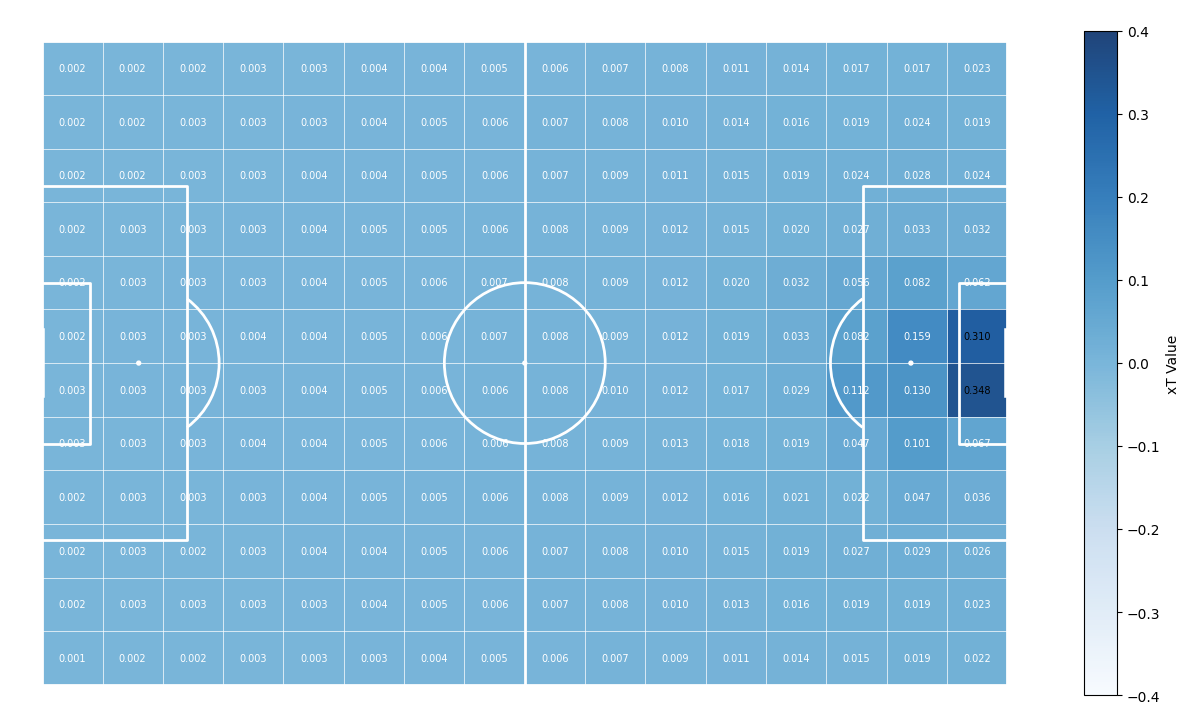

In [73]:
from mplsoccer import Pitch
import numpy as np
from socceraction.xthreat import load_model
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt  # Ensure this is imported

# Load the xT model
file_path = r"C:\Users\jda\Desktop\Speciale\xtmodelv2.pkl"
xTModel = load_model(file_path)
xT = np.array(xTModel.xT)  # shape: (12, 16)

# Create a pitch with a larger figure size
pitch = Pitch(line_color='white', pitch_color='white')
fig, ax = pitch.draw(figsize=(12, 8))  # Adjust figure size for a bigger map

# Normalize the colormap to adjust the scale
norm = Normalize(vmin=-.4, vmax=0.4)  # Adjust vmax to control the upper limit of the scale

# Draw heatmap using ax.imshow with the 'Blues' colormap and normalization
heatmap = ax.imshow(
    xT,
    extent=(0, pitch.dim.pitch_length, 0, pitch.dim.pitch_width),
    origin='lower',
    cmap='Blues',  # Use the 'Blues' colormap
    norm=norm,     # Apply normalization
    alpha=0.9
)

# Add grid lines manually
rows, cols = xT.shape
cell_length = pitch.dim.pitch_length / cols
cell_width = pitch.dim.pitch_width / rows

# Draw vertical lines
for j in range(1, cols):
    ax.vlines(j * cell_length, 0, pitch.dim.pitch_width, color='white', linewidth=0.5)

# Draw horizontal lines
for i in range(1, rows):
    ax.hlines(i * cell_width, 0, pitch.dim.pitch_length, color='white', linewidth=0.5)

# Annotate each cell with its value
for i in range(rows):
    for j in range(cols):
        val = xT[i, j]
        x = cell_length * (j + 0.5)
        y = cell_width * (i + 0.5)
        # Change text color based on value for better visibility
        text_color = 'white' if val < 0.5 * xT.max() else 'black'
        ax.text(x, y, f"{val:.3f}", ha='center', va='center', color=text_color, fontsize=7)

# Add a color bar
cbar = fig.colorbar(heatmap, ax=ax, orientation='vertical', fraction=0.03, pad=0.04)
cbar.set_label('xT Value', color='black')  # Label for the color bar
cbar.ax.yaxis.set_tick_params(color='black')  # Set tick color
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='black')  # Set tick label color

plt.show()

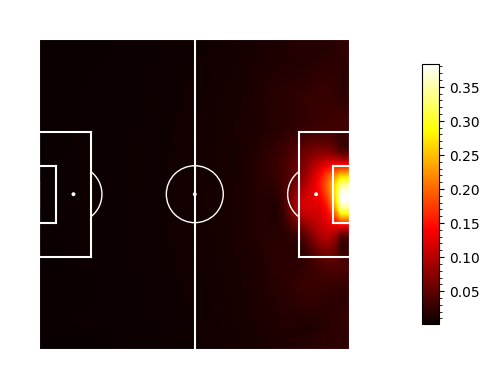

<Axes: >

In [5]:
# Create the interpolator manually
cell_length = spadlconfig.field_length / xTModel.xT.shape[1]
cell_width = spadlconfig.field_width / xTModel.xT.shape[0]
x = np.arange(0.0, spadlconfig.field_length, cell_length) + 0.5 * cell_length
y = np.arange(0.0, spadlconfig.field_width, cell_width) + 0.5 * cell_width

# Use RectBivariateSpline instead of interp2d
interp = RectBivariateSpline(y, x, xTModel.xT)

# Generate fine-grid values
x_fine = np.linspace(0, 100, 1000)
y_fine = np.linspace(0, 100, 1000)
X, Y = np.meshgrid(x_fine, y_fine)

# Plot interpolated heatmap
mps.heatmap(interp(y_fine, x_fine), cmap="hot", linecolor="white", cbar="True")
